In [1]:
from enum import Enum
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from keras.callbacks import Callback
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
df=pd.read_csv("pose_dataset/BinhThuong.csv")
df2=pd.read_csv("data_under_scene.csv")

In [3]:
df.shape

(2866, 36)

In [4]:
df2.shape

(4100, 37)

In [5]:
# BinhThuong = 0
# QuayTrai = 1
# QuayPhai = 2
# DungDay = 3
# NemPhao = 4
# QuaySau=5

In [2]:
class Actions(Enum):
    # framewise_recognition_under_scene.h5
    BinhThuong = 0
    QuayTrai = 1
    QuayPhai = 2
    DungDay = 3
    NemPhao = 4
    QuaySau=5

In [3]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
import pandas as pd
df = pd.read_csv('data_train.csv')
so_luong_moi_lop = df['class'].value_counts()
print(so_luong_moi_lop)


class
4    4200
0    2867
2    2047
5    1645
3    1565
1    1300
Name: count, dtype: int64


In [6]:
raw_data = pd.read_csv(r'data_train.csv', header=0)
dataset = raw_data.values
X = dataset[:, 0:36].astype(float)
Y = dataset[:, 36]
# X = dataset[0:, 0:36].astype(float)  
# Y = dataset[0:3289, 36]
encoder = LabelEncoder()
# encoder_Y = encoder.fit_transform(Y)
# print(encoder_Y[0], encoder_Y[1], encoder_Y[2], encoder_Y[2700])
# encoder_Y = [0]*744 + [1]*722 + [2]*815 + [3]*1008 + [4]*811
print(len([0]*744))
encoder_Y = [0]*2867 + [1]*1300 + [2]*2047 + [3]*1565 + [4]*4200 + ([5]*1645)
dummy_Y = np_utils.to_categorical(encoder_Y)

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_Y, test_size=0.2, random_state=500)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

744


In [7]:
num_records_per_class = np.sum(Y_test, axis=0)

print("Số lượng bản ghi trên mỗi lớp:")
print(num_records_per_class)

Số lượng bản ghi trên mỗi lớp:
[310. 139. 202. 151. 400. 161.]


In [11]:
model = Sequential()
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=14, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=6, activation='softmax'))  
# model = Sequential()
# model.add(Dense(units=128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(units=64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(units=16, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(units=6, activation='softmax'))

In [12]:
his = LossHistory()
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

Train on 10899 samples, validate on 1362 samples
Epoch 1/120
10899/10899 [==============================] - 4s 326us/step - loss: 1.5938 - accuracy: 0.3976 - val_loss: 1.2850 - val_accuracy: 0.5720
Epoch 2/120
10899/10899 [==============================] - 2s 212us/step - loss: 1.2812 - accuracy: 0.5437 - val_loss: 1.0564 - val_accuracy: 0.6483
Epoch 3/120
10899/10899 [==============================] - 2s 218us/step - loss: 1.1372 - accuracy: 0.6034 - val_loss: 1.0417 - val_accuracy: 0.6689
Epoch 4/120
10899/10899 [==============================] - 2s 209us/step - loss: 1.0454 - accuracy: 0.6279 - val_loss: 0.9147 - val_accuracy: 0.6931
Epoch 5/120
10899/10899 [==============================] - 2s 224us/step - loss: 0.9694 - accuracy: 0.6589 - val_loss: 0.8411 - val_accuracy: 0.7261
Epoch 6/120
10899/10899 [==============================] - 3s 234us/step - loss: 0.9172 - accuracy: 0.6750 - val_loss: 0.7801 - val_accuracy: 0.7467
Epoch 7/120
10899/10899 [==============================] 

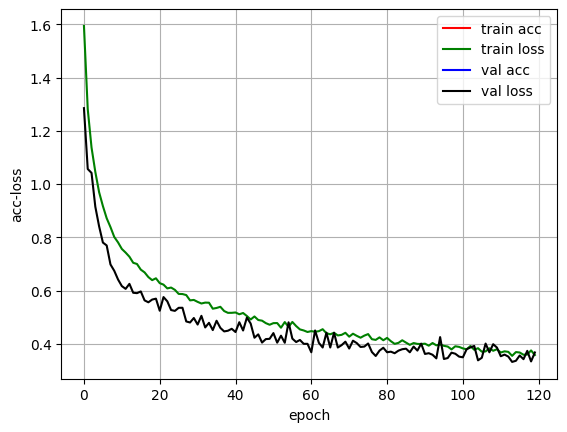

In [13]:
model.fit(X_train, Y_train, batch_size=16, epochs=120, verbose=1, validation_data=(X_val, Y_val), callbacks=[his])
model.summary()
his.loss_plot('epoch')
model.save('model.h5')

In [14]:
print('Test:')
score, accuracy = model.evaluate(X_test,Y_test,batch_size=32)
print('Test Score:{:.3}'.format(score))
print('Test accuracy:{:.3}'.format(accuracy))

Test:
1363/1363 [==============================] - 0s 30us/step
Test Score:0.364
Test accuracy:0.832


In [15]:
Y_pred = model.predict(X_test)
cfm = confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(Y_pred, axis=1))
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[298   0   2  10   0   0]
 [  1  55  66   0   1  16]
 [  1   7 190   4   0   0]
 [ 10   0   5 136   0   0]
 [  1   0   8   2 372  17]
 [  1  44  18   0  15  83]]


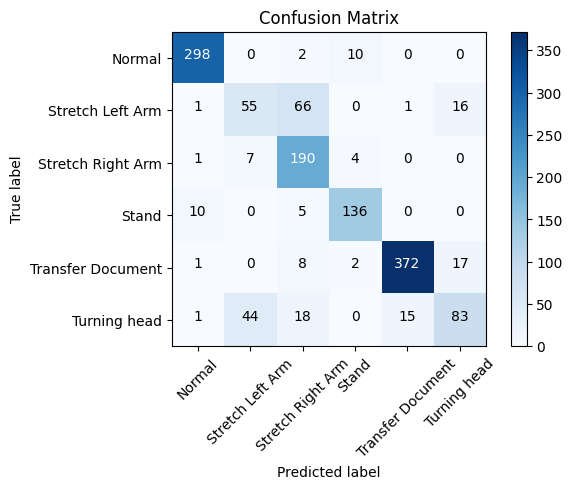

BinhThuong


In [18]:
plt.figure()
class_names = ['Normal', 'Stretch Left Arm', 'Stretch Right Arm', 'Stand','Transfer Document','Turning head']
plot_confusion_matrix(cfm, classes=class_names, title='Confusion Matrix')
plt.show()

# test
model = load_model('weights.h5')

test_input = [0,0,0.75,0.95,0.64,0.95,0.58,1.11,0.67,1.14,0.83,0.95,0.89,1.08,0.83,1.17,0.67,1.27,0,0,0,0,0.81,1.24,0,0,0,0,0,0,0,0,0.72,0.95,0.78,0.98]
test_np = np.array(test_input)
test_np = test_np.reshape(-1, 36)

test_np = np.array(X[1033]).reshape(-1, 36)
if test_np.size > 0:
    pred = np.argmax(model.predict(test_np))
    init_label = Actions(pred).name
    print(init_label)

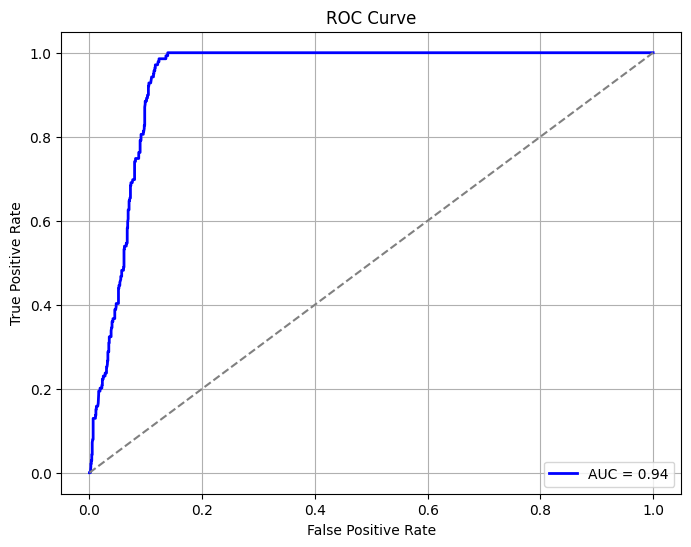

In [51]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, log_loss
Y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test[:, 1], Y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

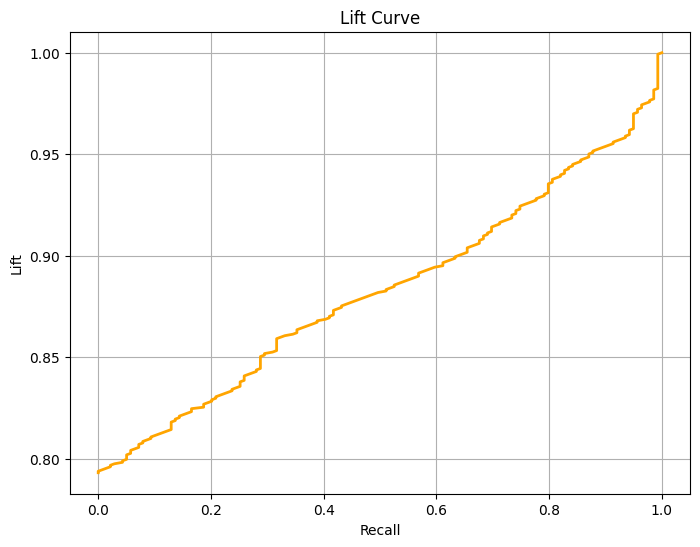

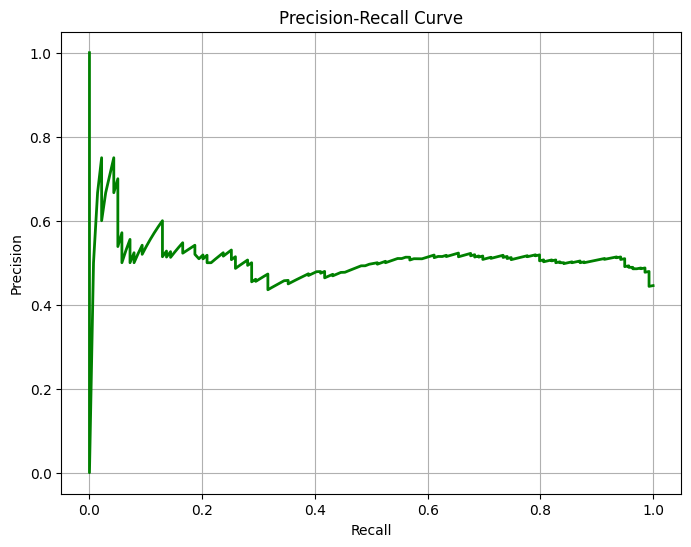

In [27]:
# Tính toán precision, recall và ngưỡng
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test[:, 1], Y_pred_proba[:, 1])

# Tính toán đường cong Lift
total_instances = len(Y_test)
lift = [((total_instances - i) / total_instances) for i in range(total_instances)]
lift = lift[:len(recall)]  # Điều chỉnh kích thước của lift

# Vẽ đường cong Lift
plt.figure(figsize=(8, 6))
plt.plot(recall, lift, color='orange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.grid(True)
plt.show()

# Vẽ đồ thị Precision-Recall
from sklearn.metrics import precision_recall_curve

# Tính toán precision, recall và ngưỡng
precision, recall, thresholds = precision_recall_curve(Y_test[:, 1], Y_pred_proba[:, 1])

# Chỉnh kích thước của precision để nó có cùng kích thước với recall
precision = precision[:len(recall)]

# Vẽ đồ thị Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()